# Transfer Speeds - Compression

## Imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors

## Load Data 

In [22]:
distributed_sheet_id = "1KYFRDbl4XWhcI51jWjkOrcD0AD8pgJI8Fp-BrjoaLH8"
distributed_sheet_names = ["zarray_chunksize", "zgroup_chunksize", "parquet_chunksize",
"zarr_compression", "parquet_compression", "slp_general_gcs", "slp_general_s3", "ETOPO1_general", "so_general"]

for i in distributed_sheet_names:
    url = f"https://docs.google.com/spreadsheets/d/{distributed_sheet_id}/gviz/tq?tqx=out:csv&sheet={i}"
    globals()[f"df_{i}"] = pd.read_csv(url)

## Plotting Code
The code found below will work for:
1. General testing between different clouds
2. Different compression algorithms
3. Different chunksizes

In [57]:
class plot:
    def split_dataframes(self, df):
        # Find min & max workers and worker step
        dfs = []
        min_workers = df['nworkers'].min()
        max_workers = df['nworkers'].max()
        step_down_index = df.index[-1] - 1
        worker_step = df['nworkers'].iloc[step_down_index] - df['nworkers'].iloc[df.index[-1]]
        df_ranges = int(max_workers/worker_step)
        for i in np.arange(0, df.index[-1], df_ranges):
            temp = df[i:(i+df_ranges)]
            temp = temp.reset_index(drop=True)
            dfs.append(temp)
        return dfs
        
    def plotVals(self, df, **kwargs):
        legend = []
        
        dfs = self.split_dataframes(df)
        color = cm.rainbow(np.linspace(0,1,len(dfs)))
        plt.rcParams['figure.dpi'] = 1000
        for i in range(len(dfs)):
            c = matplotlib.colors.to_hex(color[i,:], keep_alpha=True)
            if dfs[i]['nworkers'].max() == 40:
                ymax = 5500
            elif dfs[i]['nworkers'].max() == 100:
                ymax = 30000
            
            if 'cloud' in dfs[i]:
                title = 'Read Speeds from ' + dfs[i]['cloud'][1] + ' Cloud Storage (' + str(int(dfs[i]['nbytes'][1]/1e9)) + ' GB Dataset)'
                legend_title = 'Store Format & Cluster Provider'
                anchor = [1.27, 0.5]
                
                if dfs[i]['cloud'][1] == 'GCP' and dfs[i]['instance'][1] == 'GCP':
                    line = 'solid'
                    legend.append(dfs[i]['format'][1] + ': GCP')
                elif dfs[i]['cloud'][1] == 'GCP' and dfs[i]['instance'][1] == 'AWS':
                    line = 'dashed'
                    legend.append(dfs[i]['format'][1] + ': AWS')
                elif dfs[i]['cloud'][1] == 'AWS' and dfs[i]['instance'][1] == 'GCP':
                    line = 'solid'
                    legend.append(dfs[i]['format'][1] + ': GCP')
                elif dfs[i]['cloud'][1] == 'AWS' and dfs[i]['instance'][1] == 'AWS':
                    line = 'dashed'
                    legend.append(dfs[i]['format'][1] + ': AWS')
                else:
                    pass
        
            elif 'compressor' in dfs[i]:
                title = 'Compression Read Speeds with ' + dfs[i]['format'][1]
                legend_title = 'Compression Algorithm'
                anchor = [1.15, 0.5]
                legend.append(dfs[i]['compressor'][1])
                line = 'solid'
             
            elif 'chunks' in dfs[i]:
                title = 'Chunksize Read Speeds with ' + dfs[i]['format'][1]
                legend.append(dfs[i]['chunks'][1])
                anchor = [1.15,0.5]
                legend_title = 'Chunksize'
                line = 'solid'
            
            
            if i == 0:
                ax = dfs[i].plot(x='nworkers', y='throughput_MBps', kind='line', color=c, marker='o', linestyle=line)
            else:
                dfs[i].plot(x='nworkers', y='throughput_MBps', kind='line', color=c, ax=ax, marker='o', linestyle=line)
                
            plt.errorbar(dfs[i]['nworkers'], dfs[i]['throughput_MBps'], yerr=dfs[i]['errors'], color=c, fmt='o',
                        capsize=5, capthick=2)
            plt.grid(True)
            plt.title(title)
            plt.xlabel('Number of Parallel Reads')
            plt.ylabel('Throughput (MBps)')
            ax.set_ylim([0, ymax])
            #plt.legend(legend, bbox_to_anchor=anchor, loc='center', title=legend_title)
            plt.legend(legend, title=legend_title, **kwargs)
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plots = plot()

### Distributed

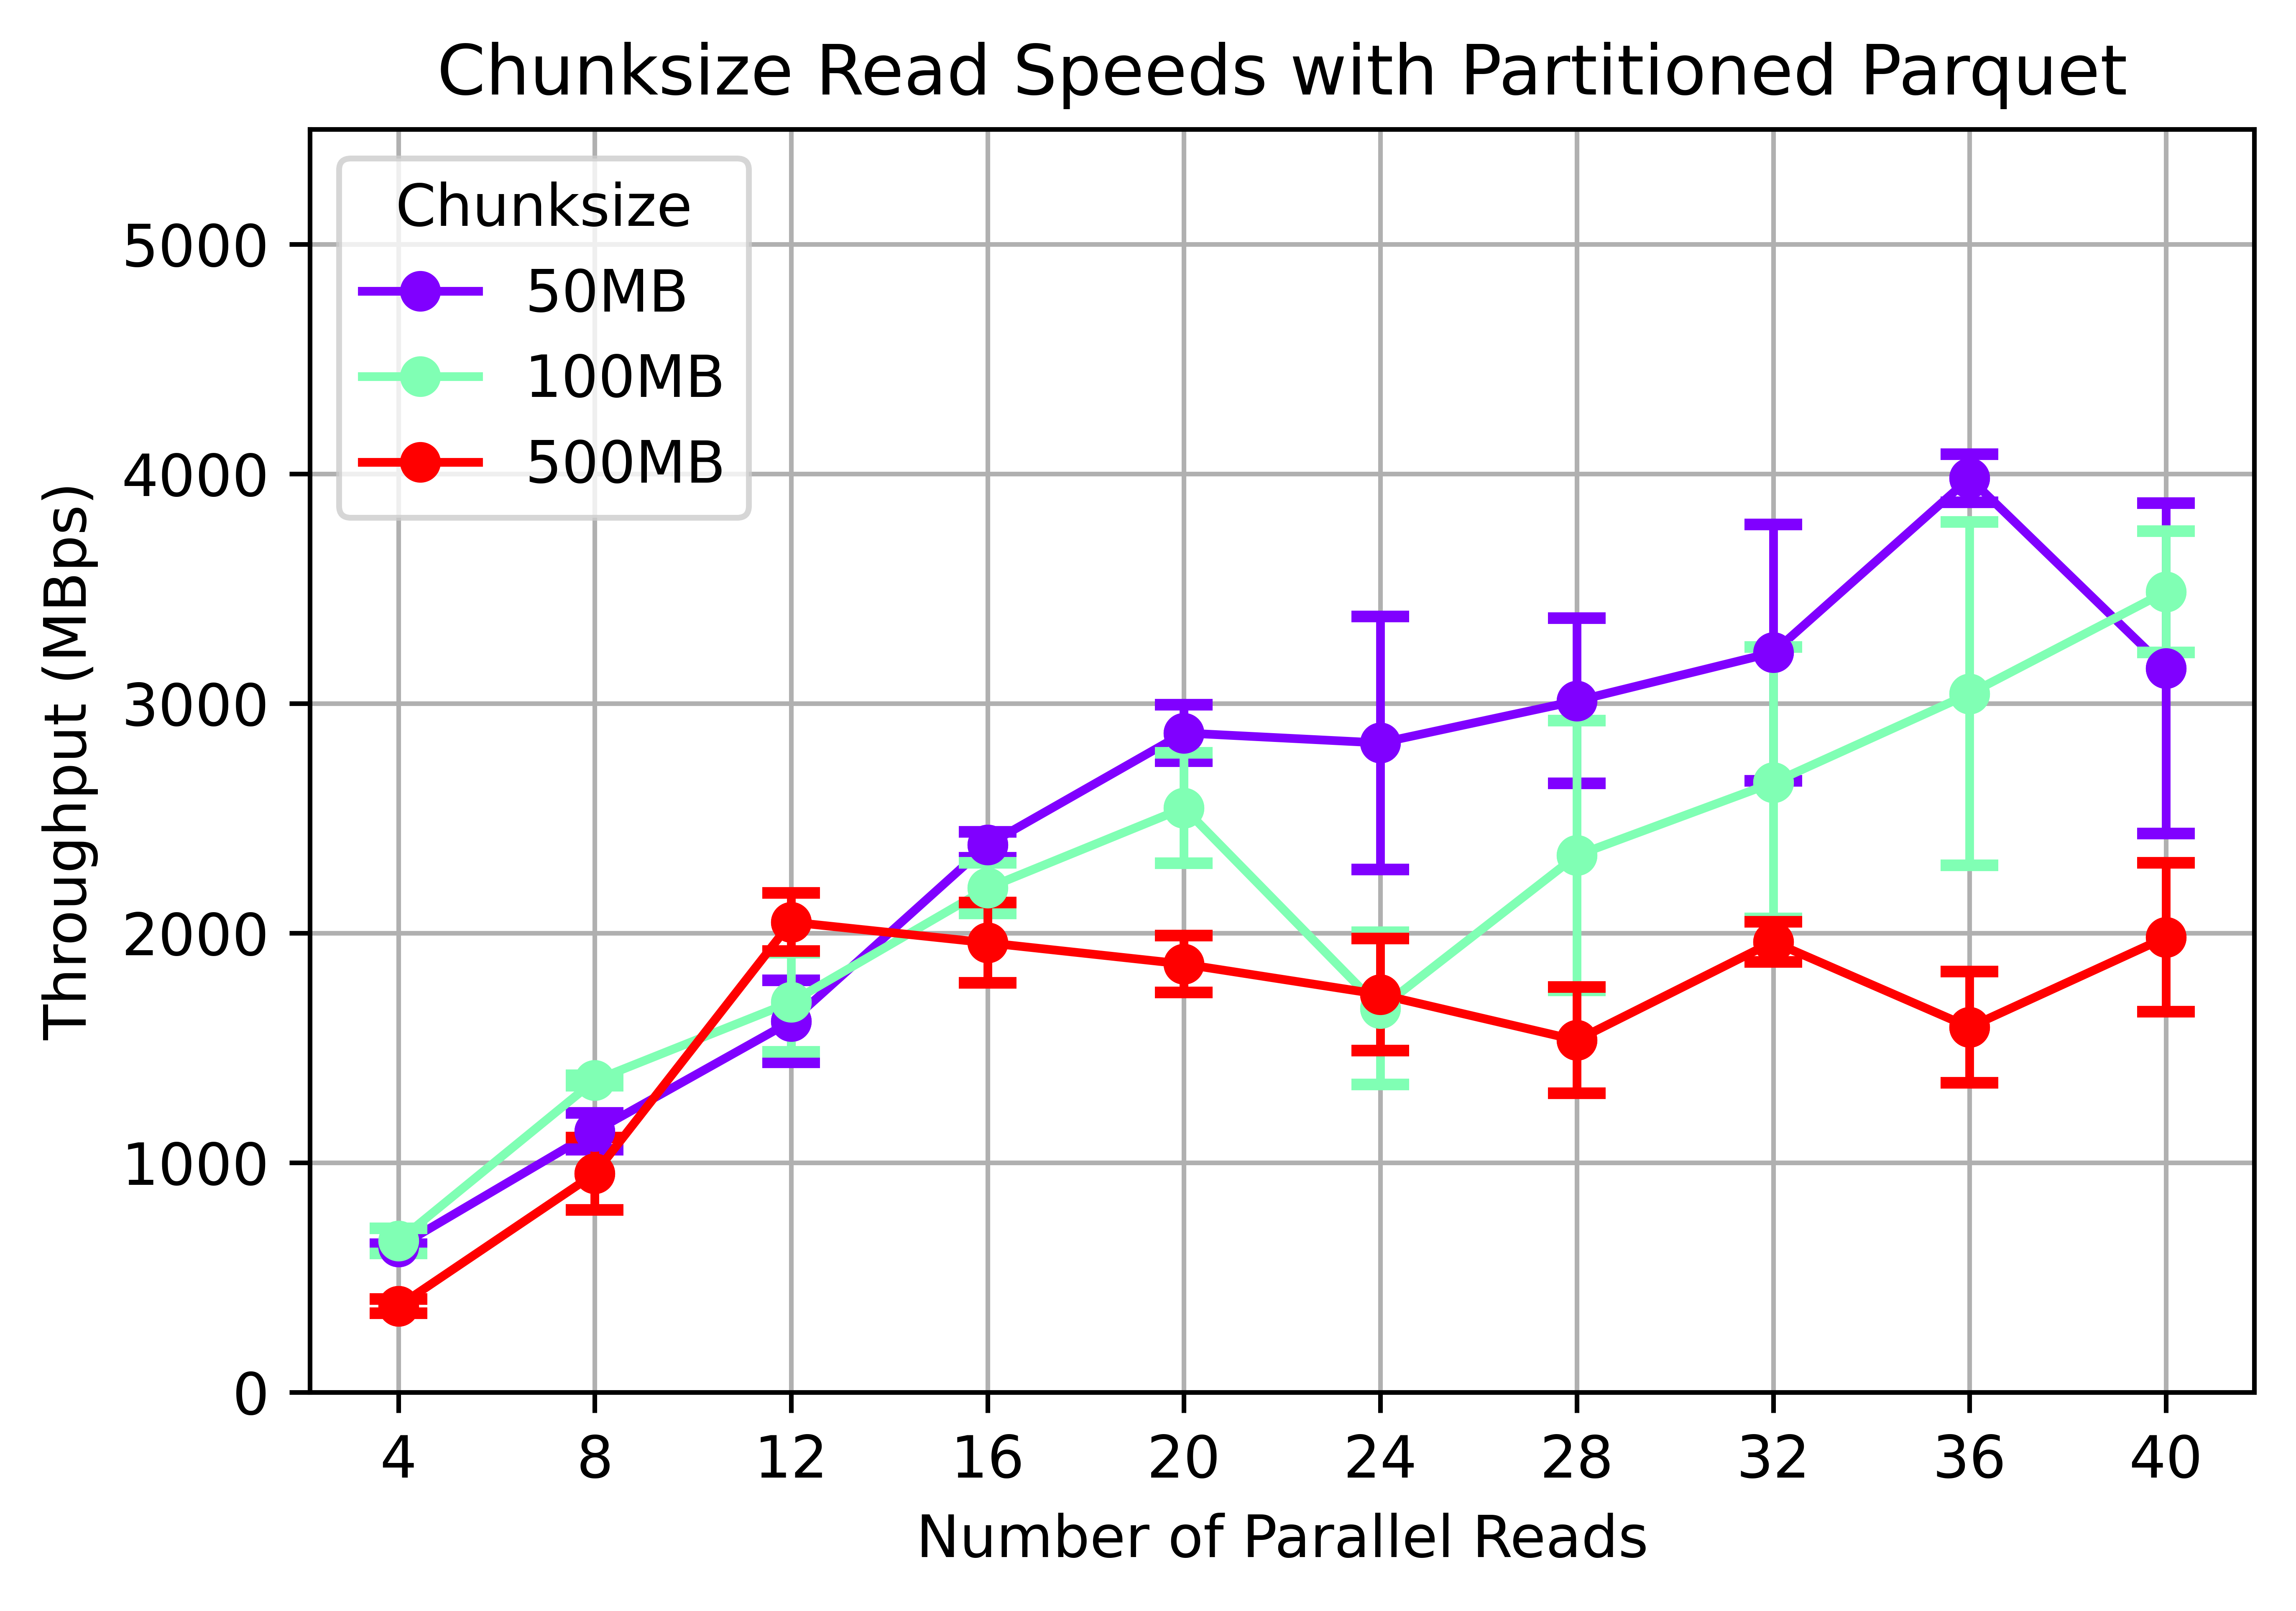

In [46]:
plots.plotVals(df_parquet_chunksize, loc='best')

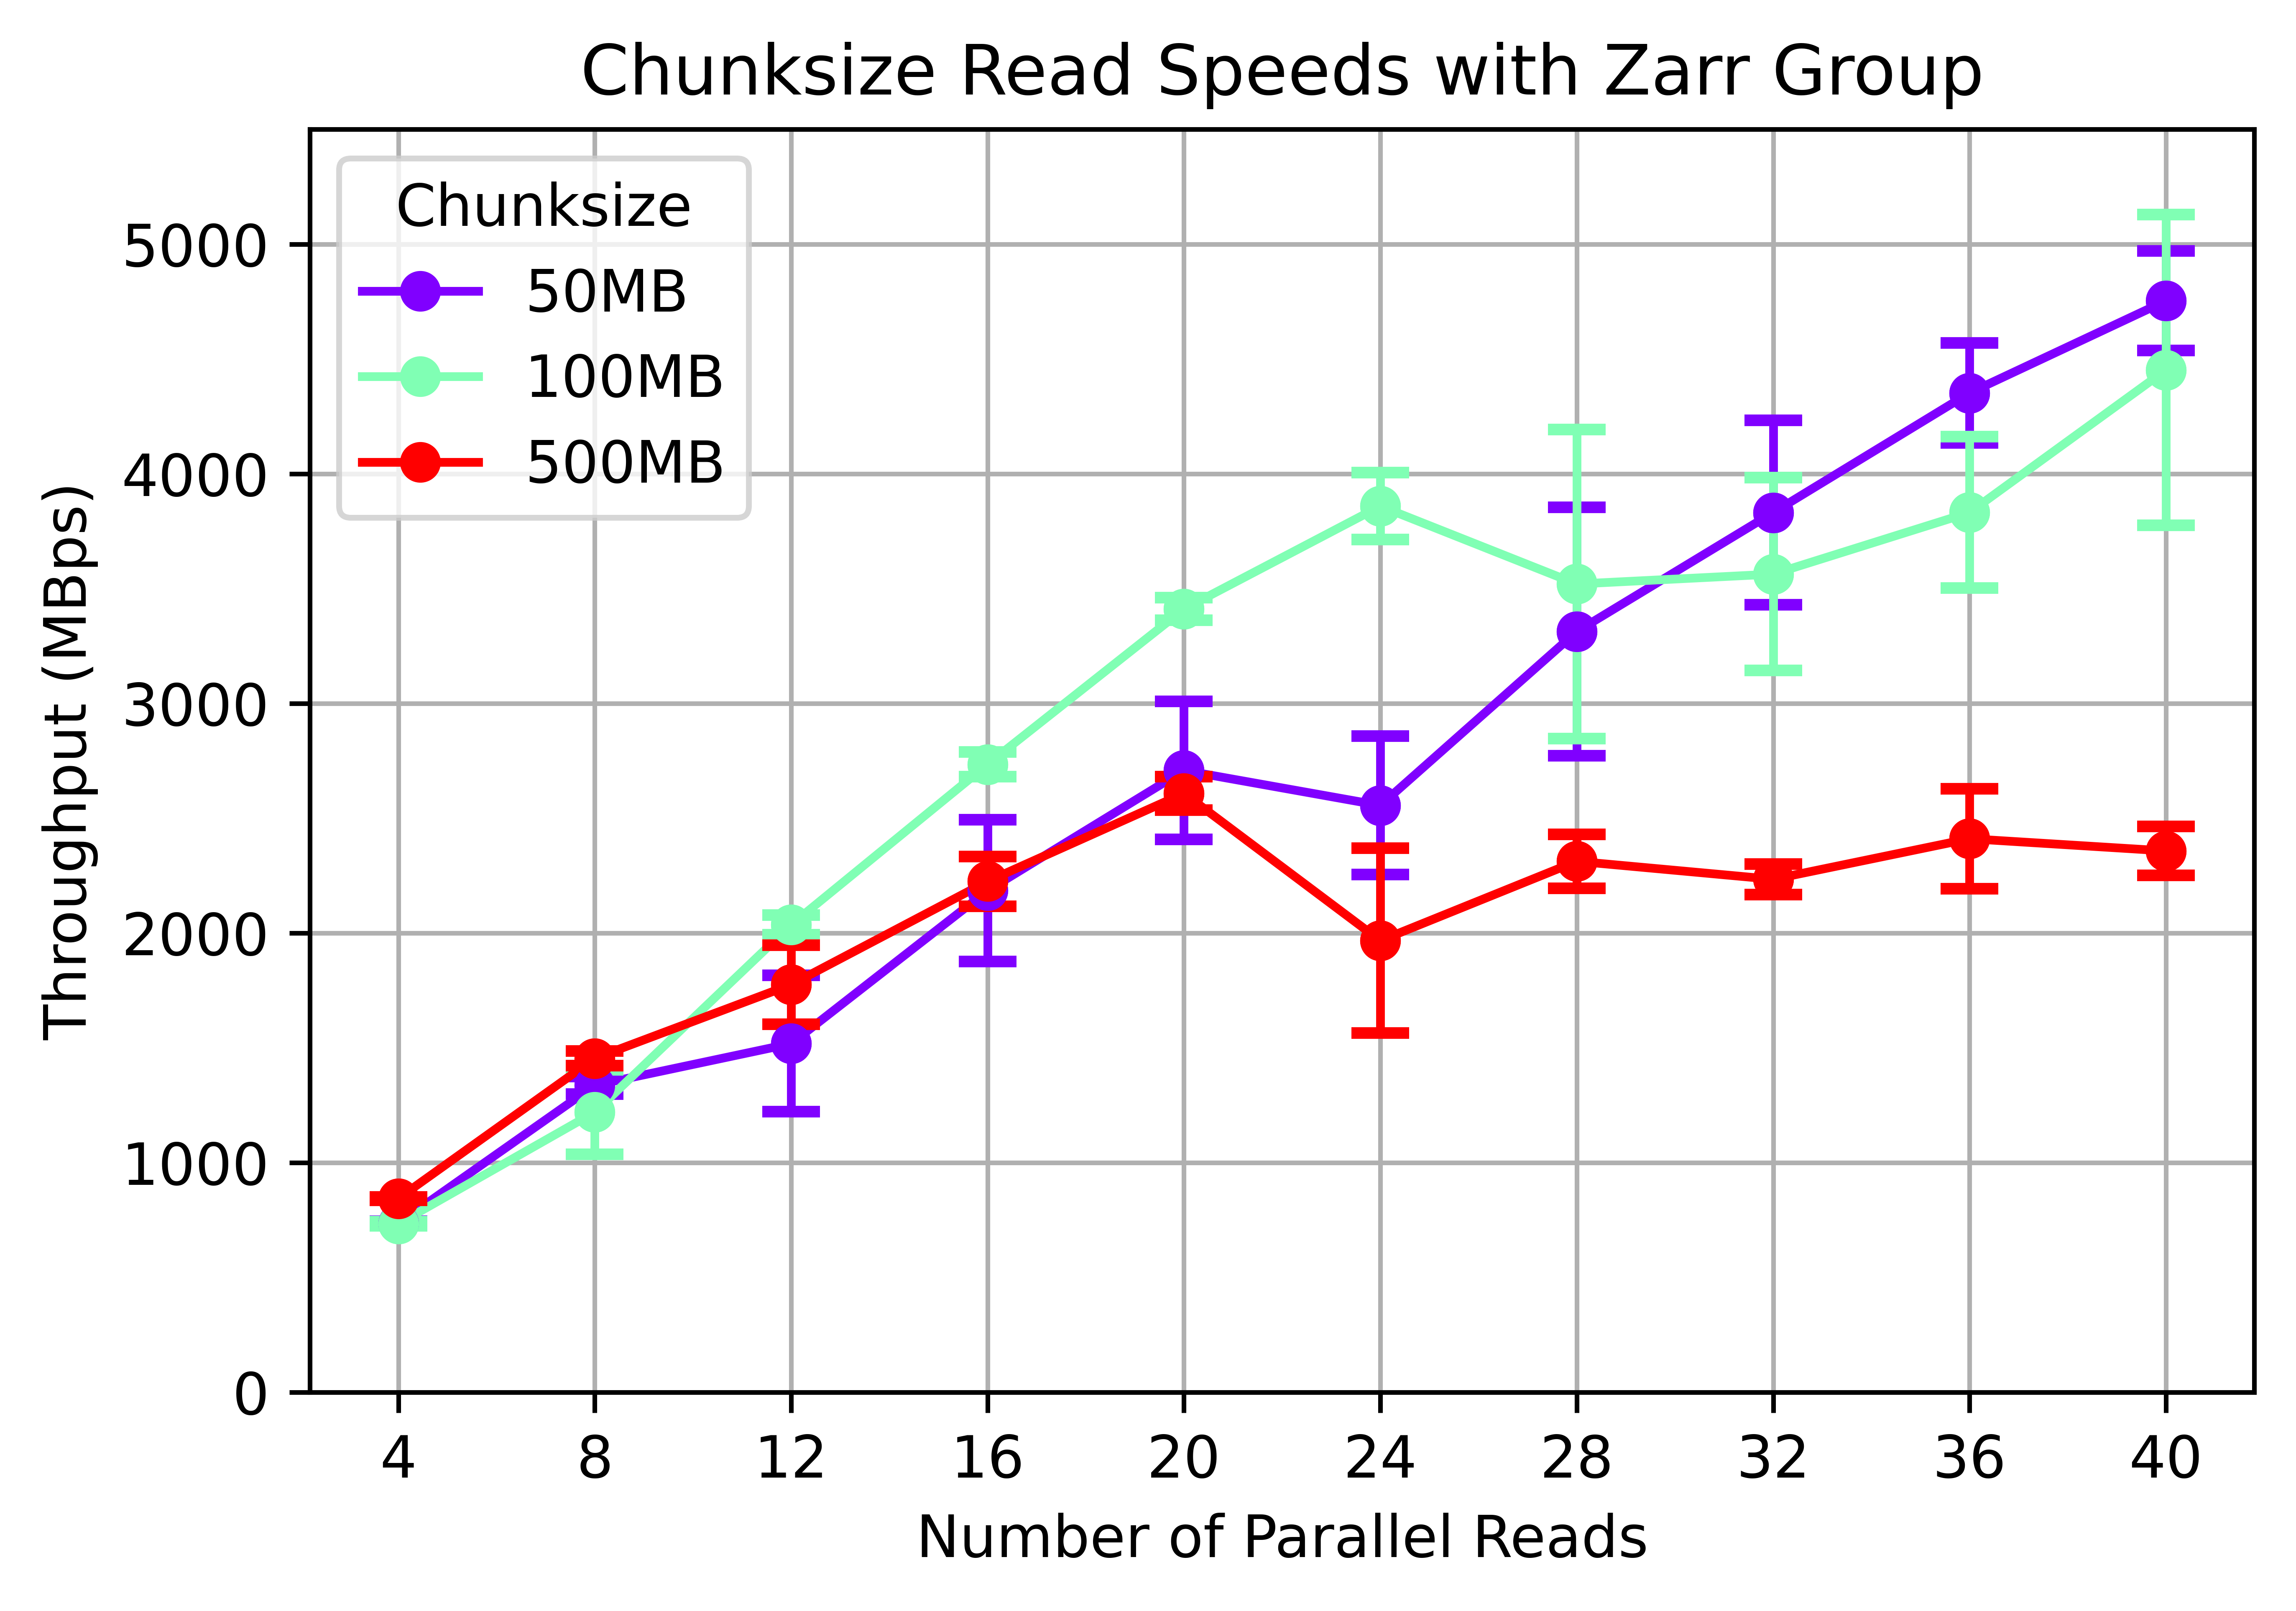

In [61]:
kwargs = dict(loc='best')
plots.plotVals(df_zgroup_chunksize, **kwargs)

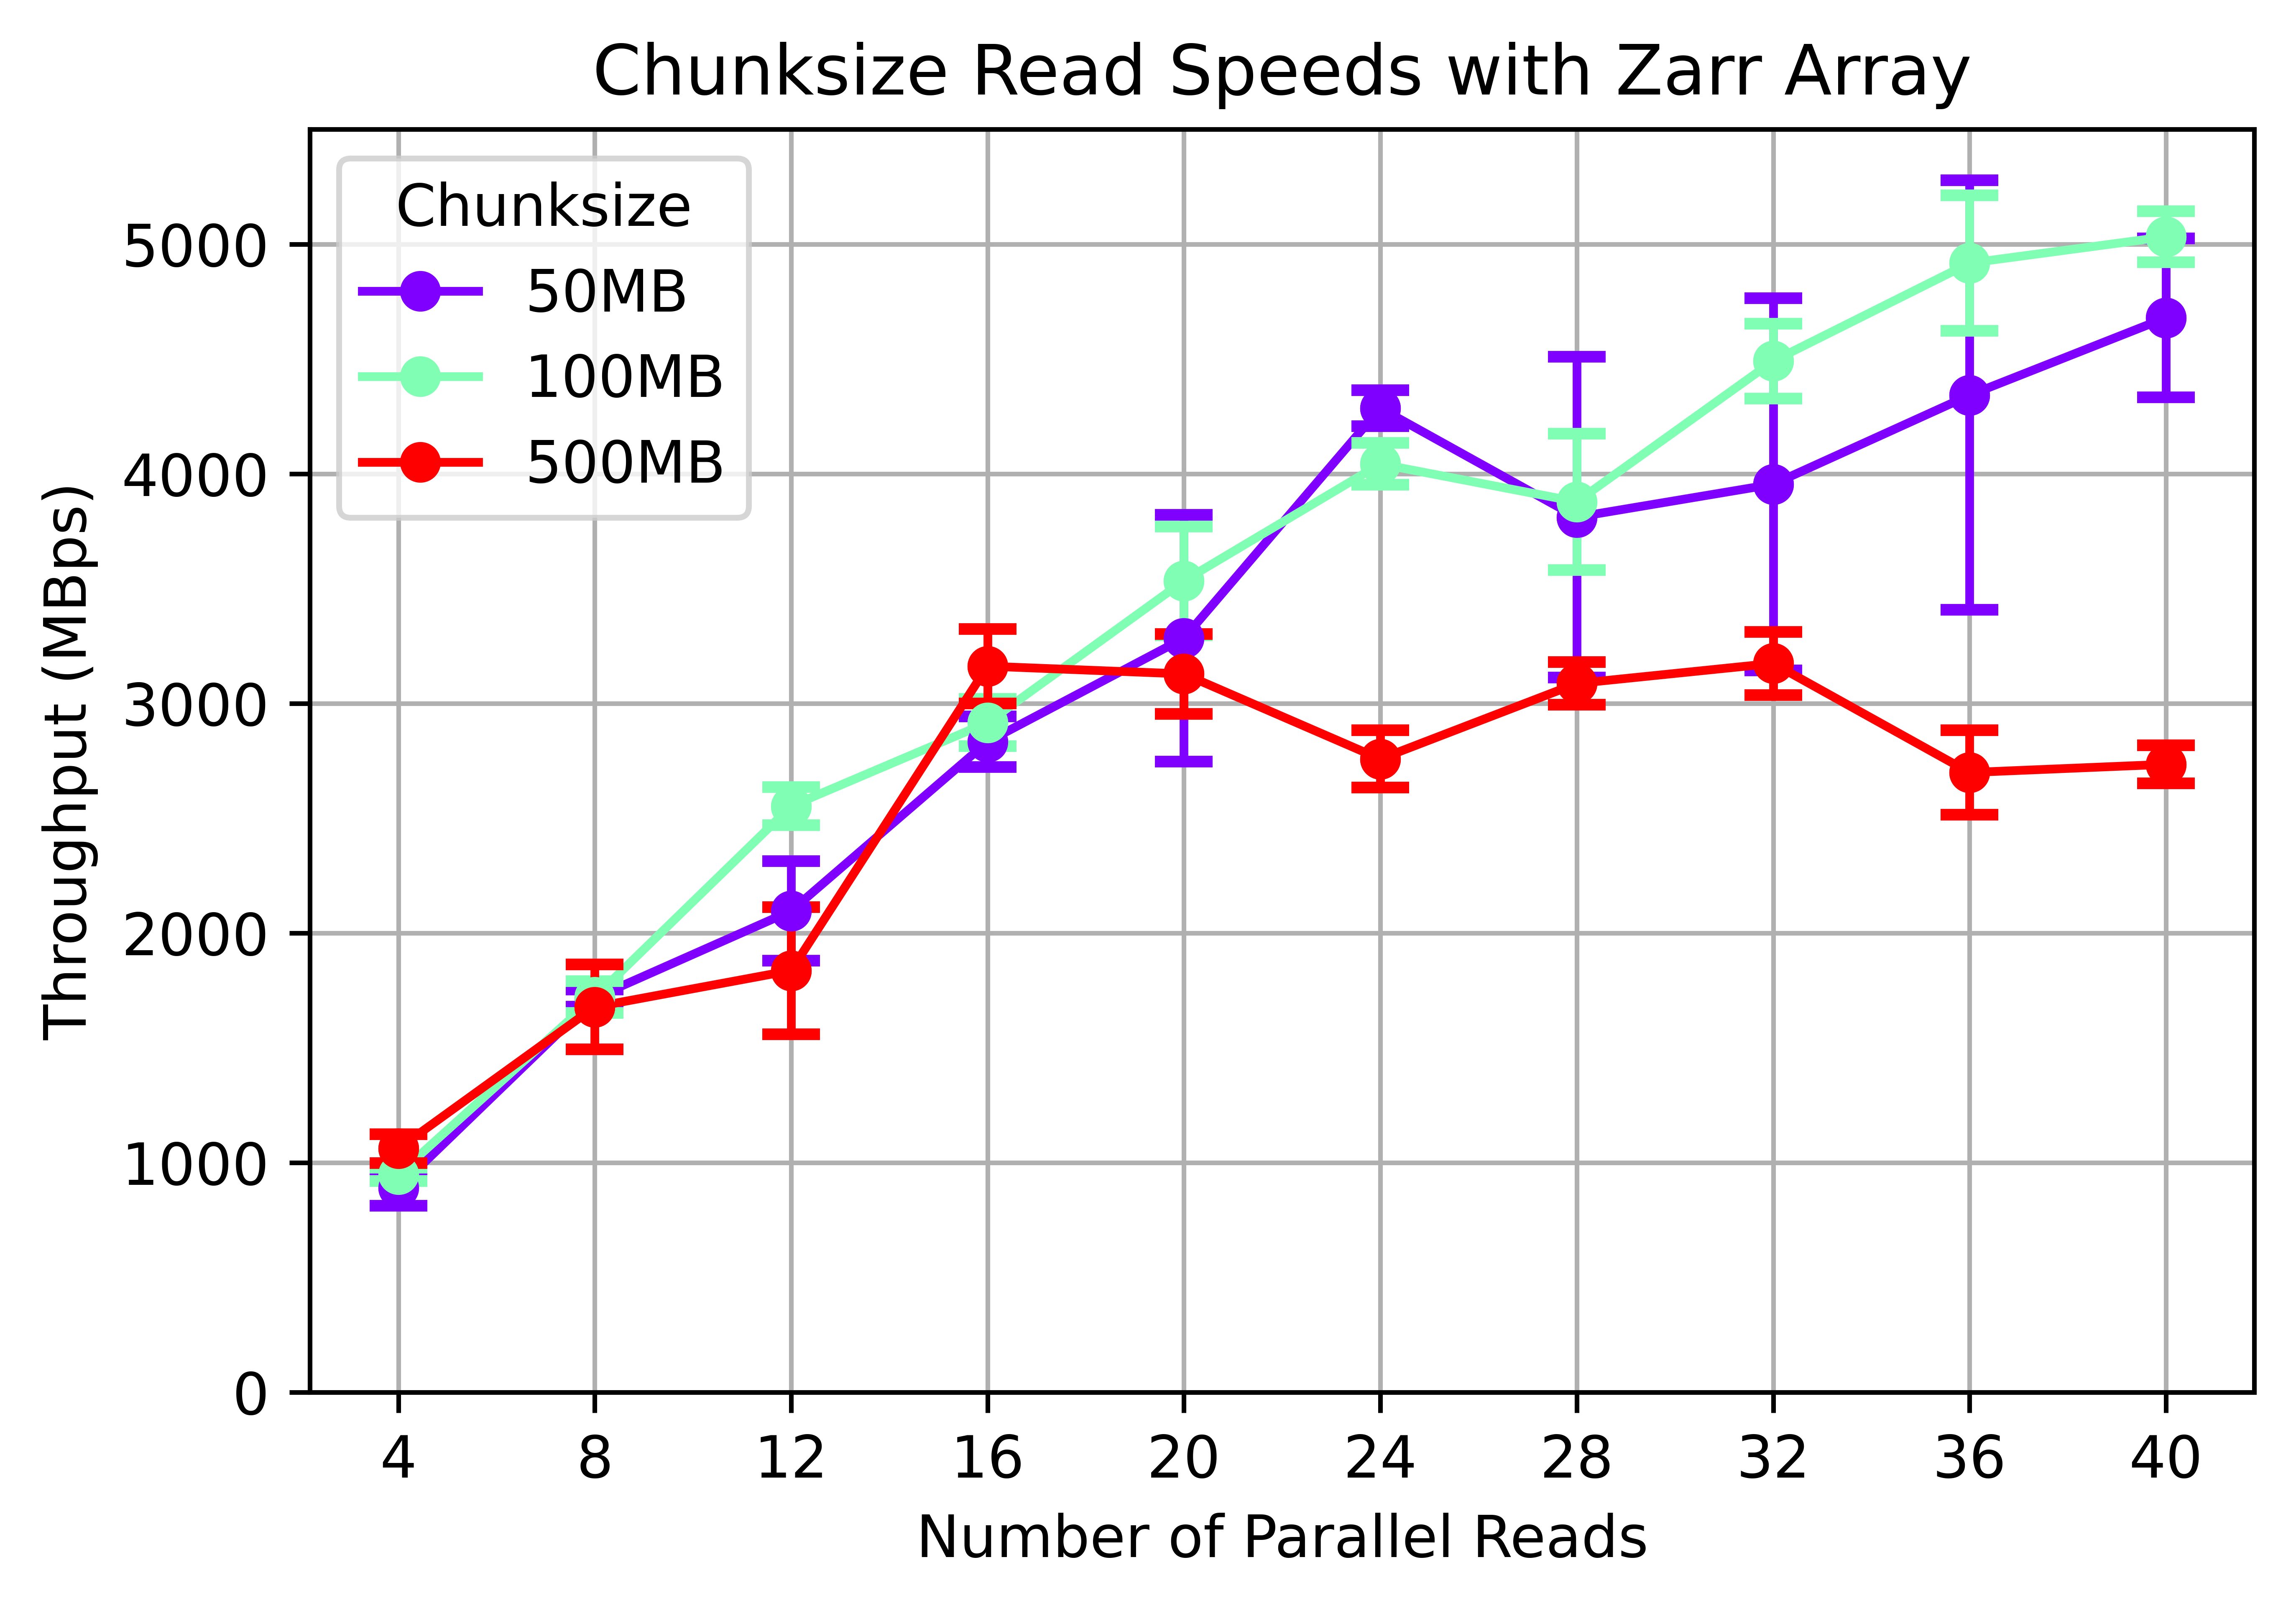

In [62]:
kwargs=dict(loc='best')
plots.plotVals(df_zarray_chunksize, **kwargs)

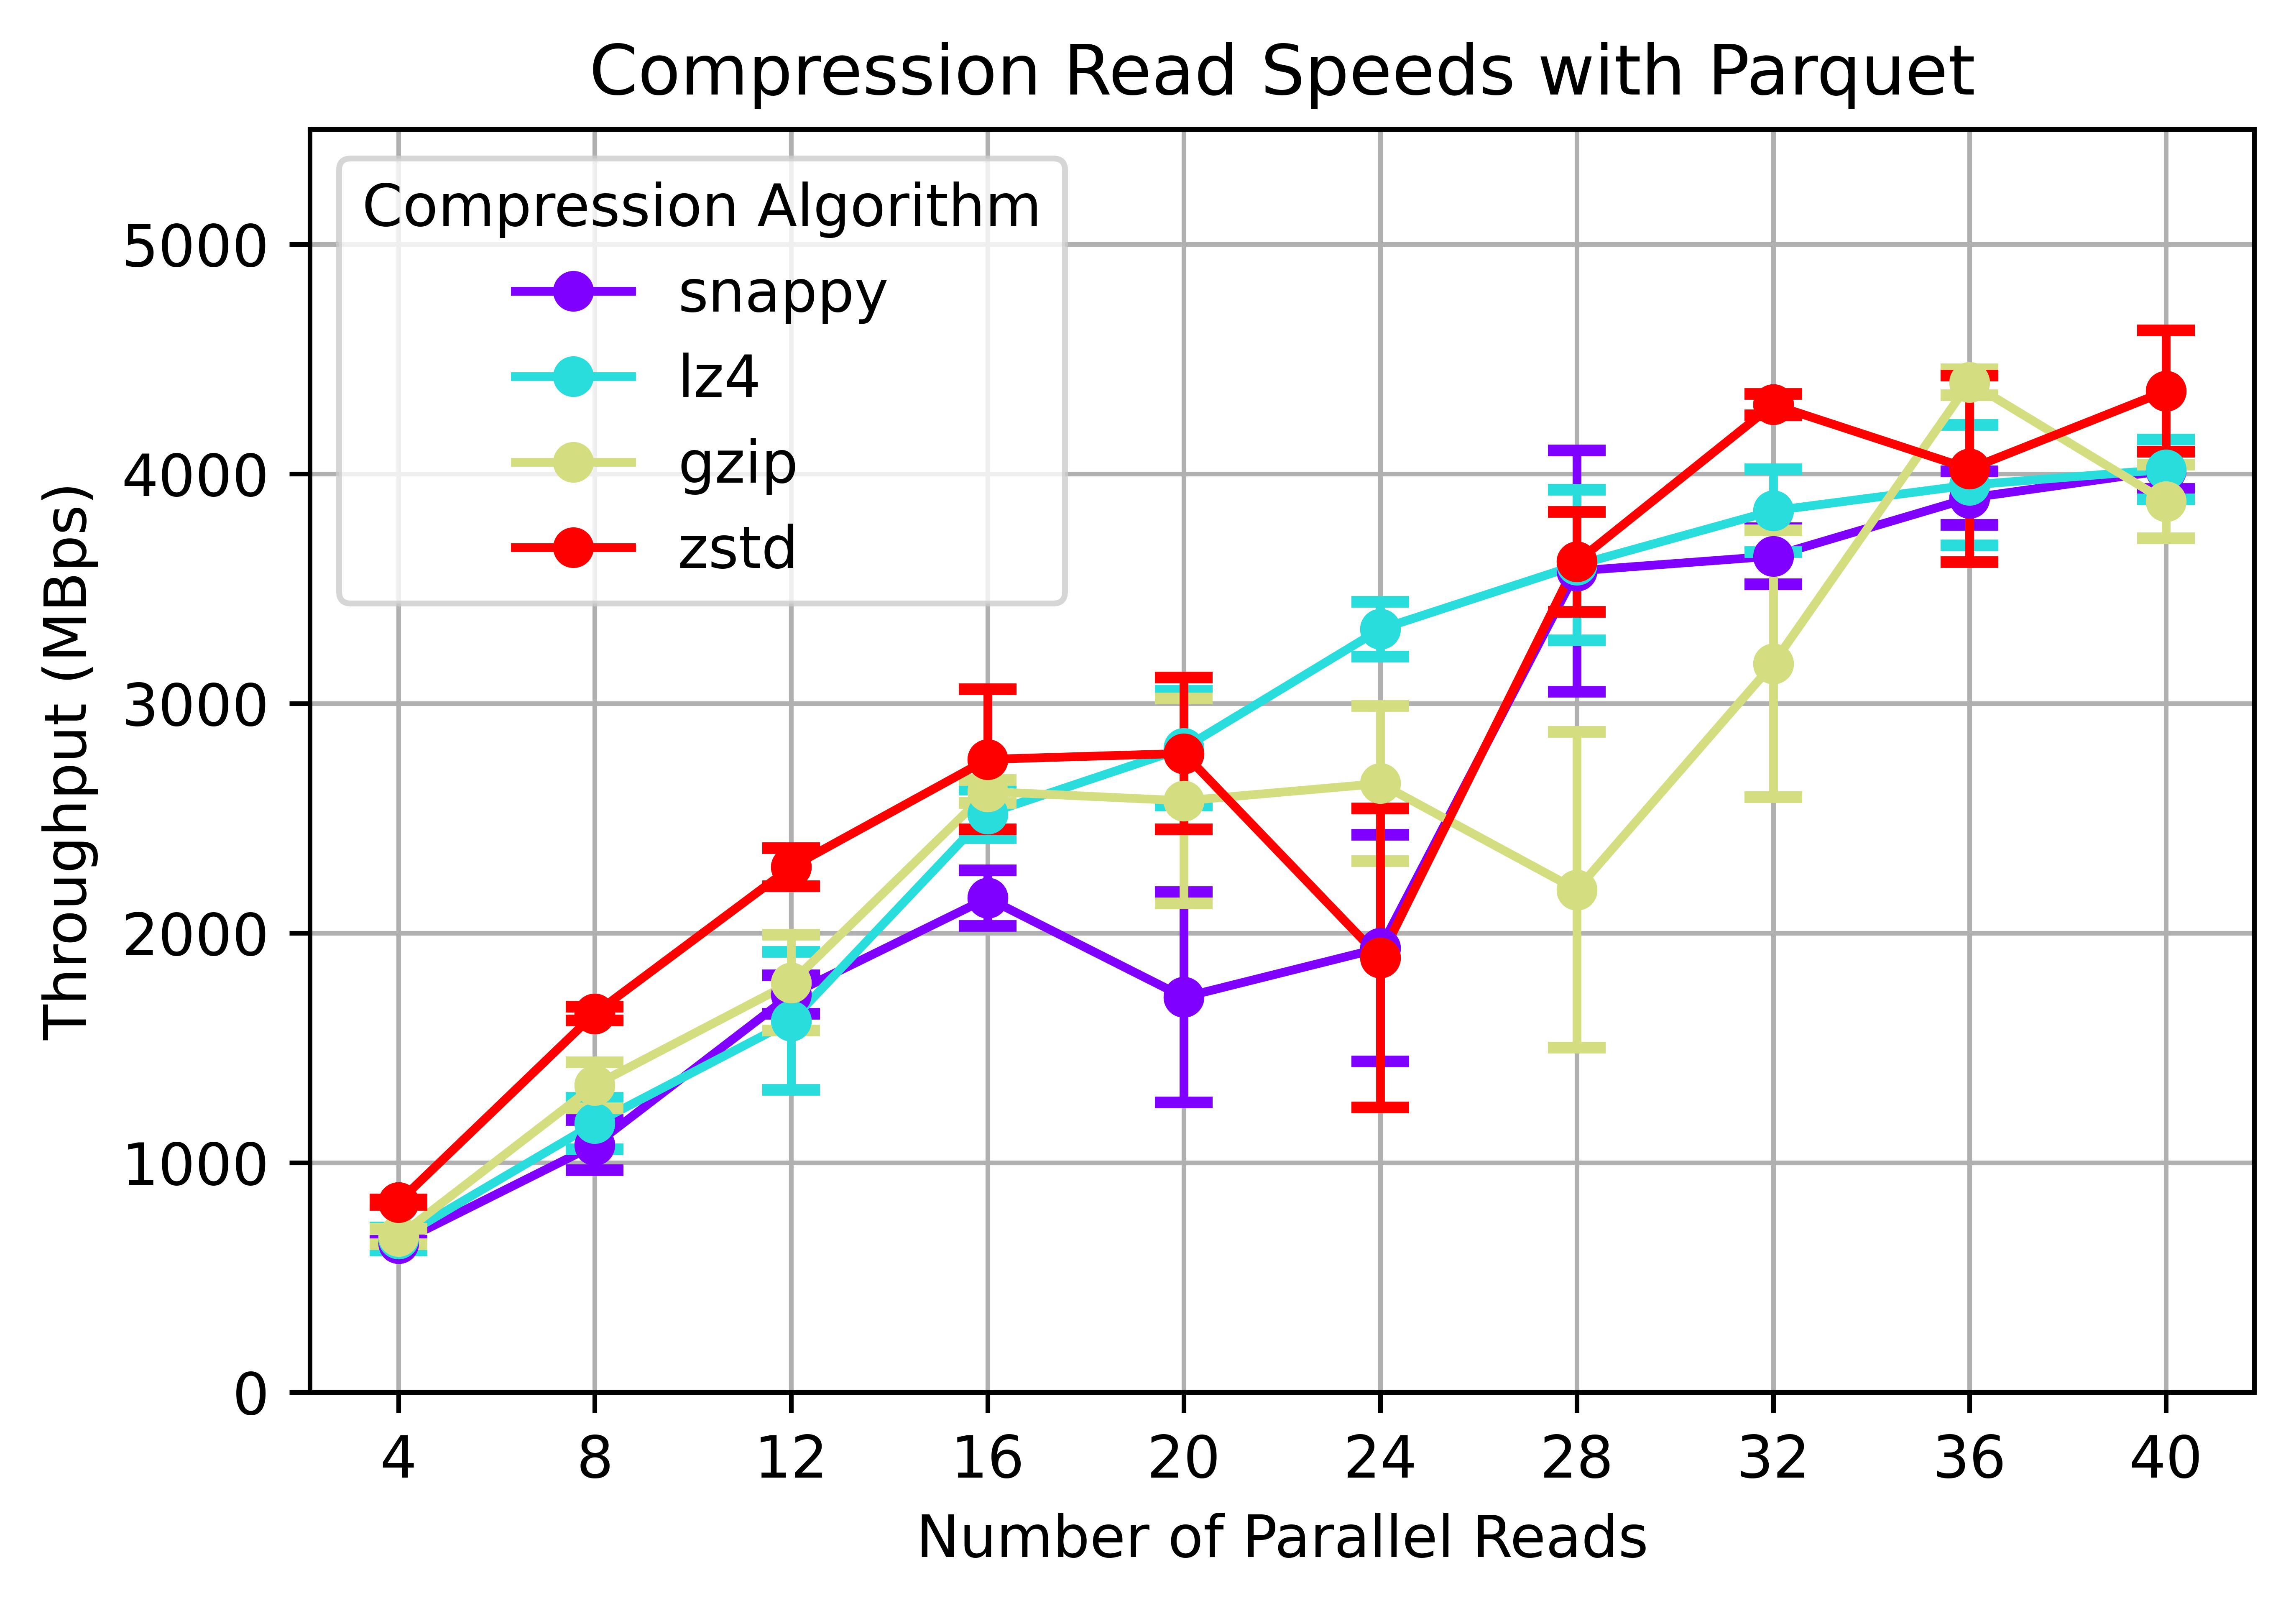

In [49]:
kwargs=dict(loc='best')
plots.plotVals(df_parquet_compression, **kwargs)

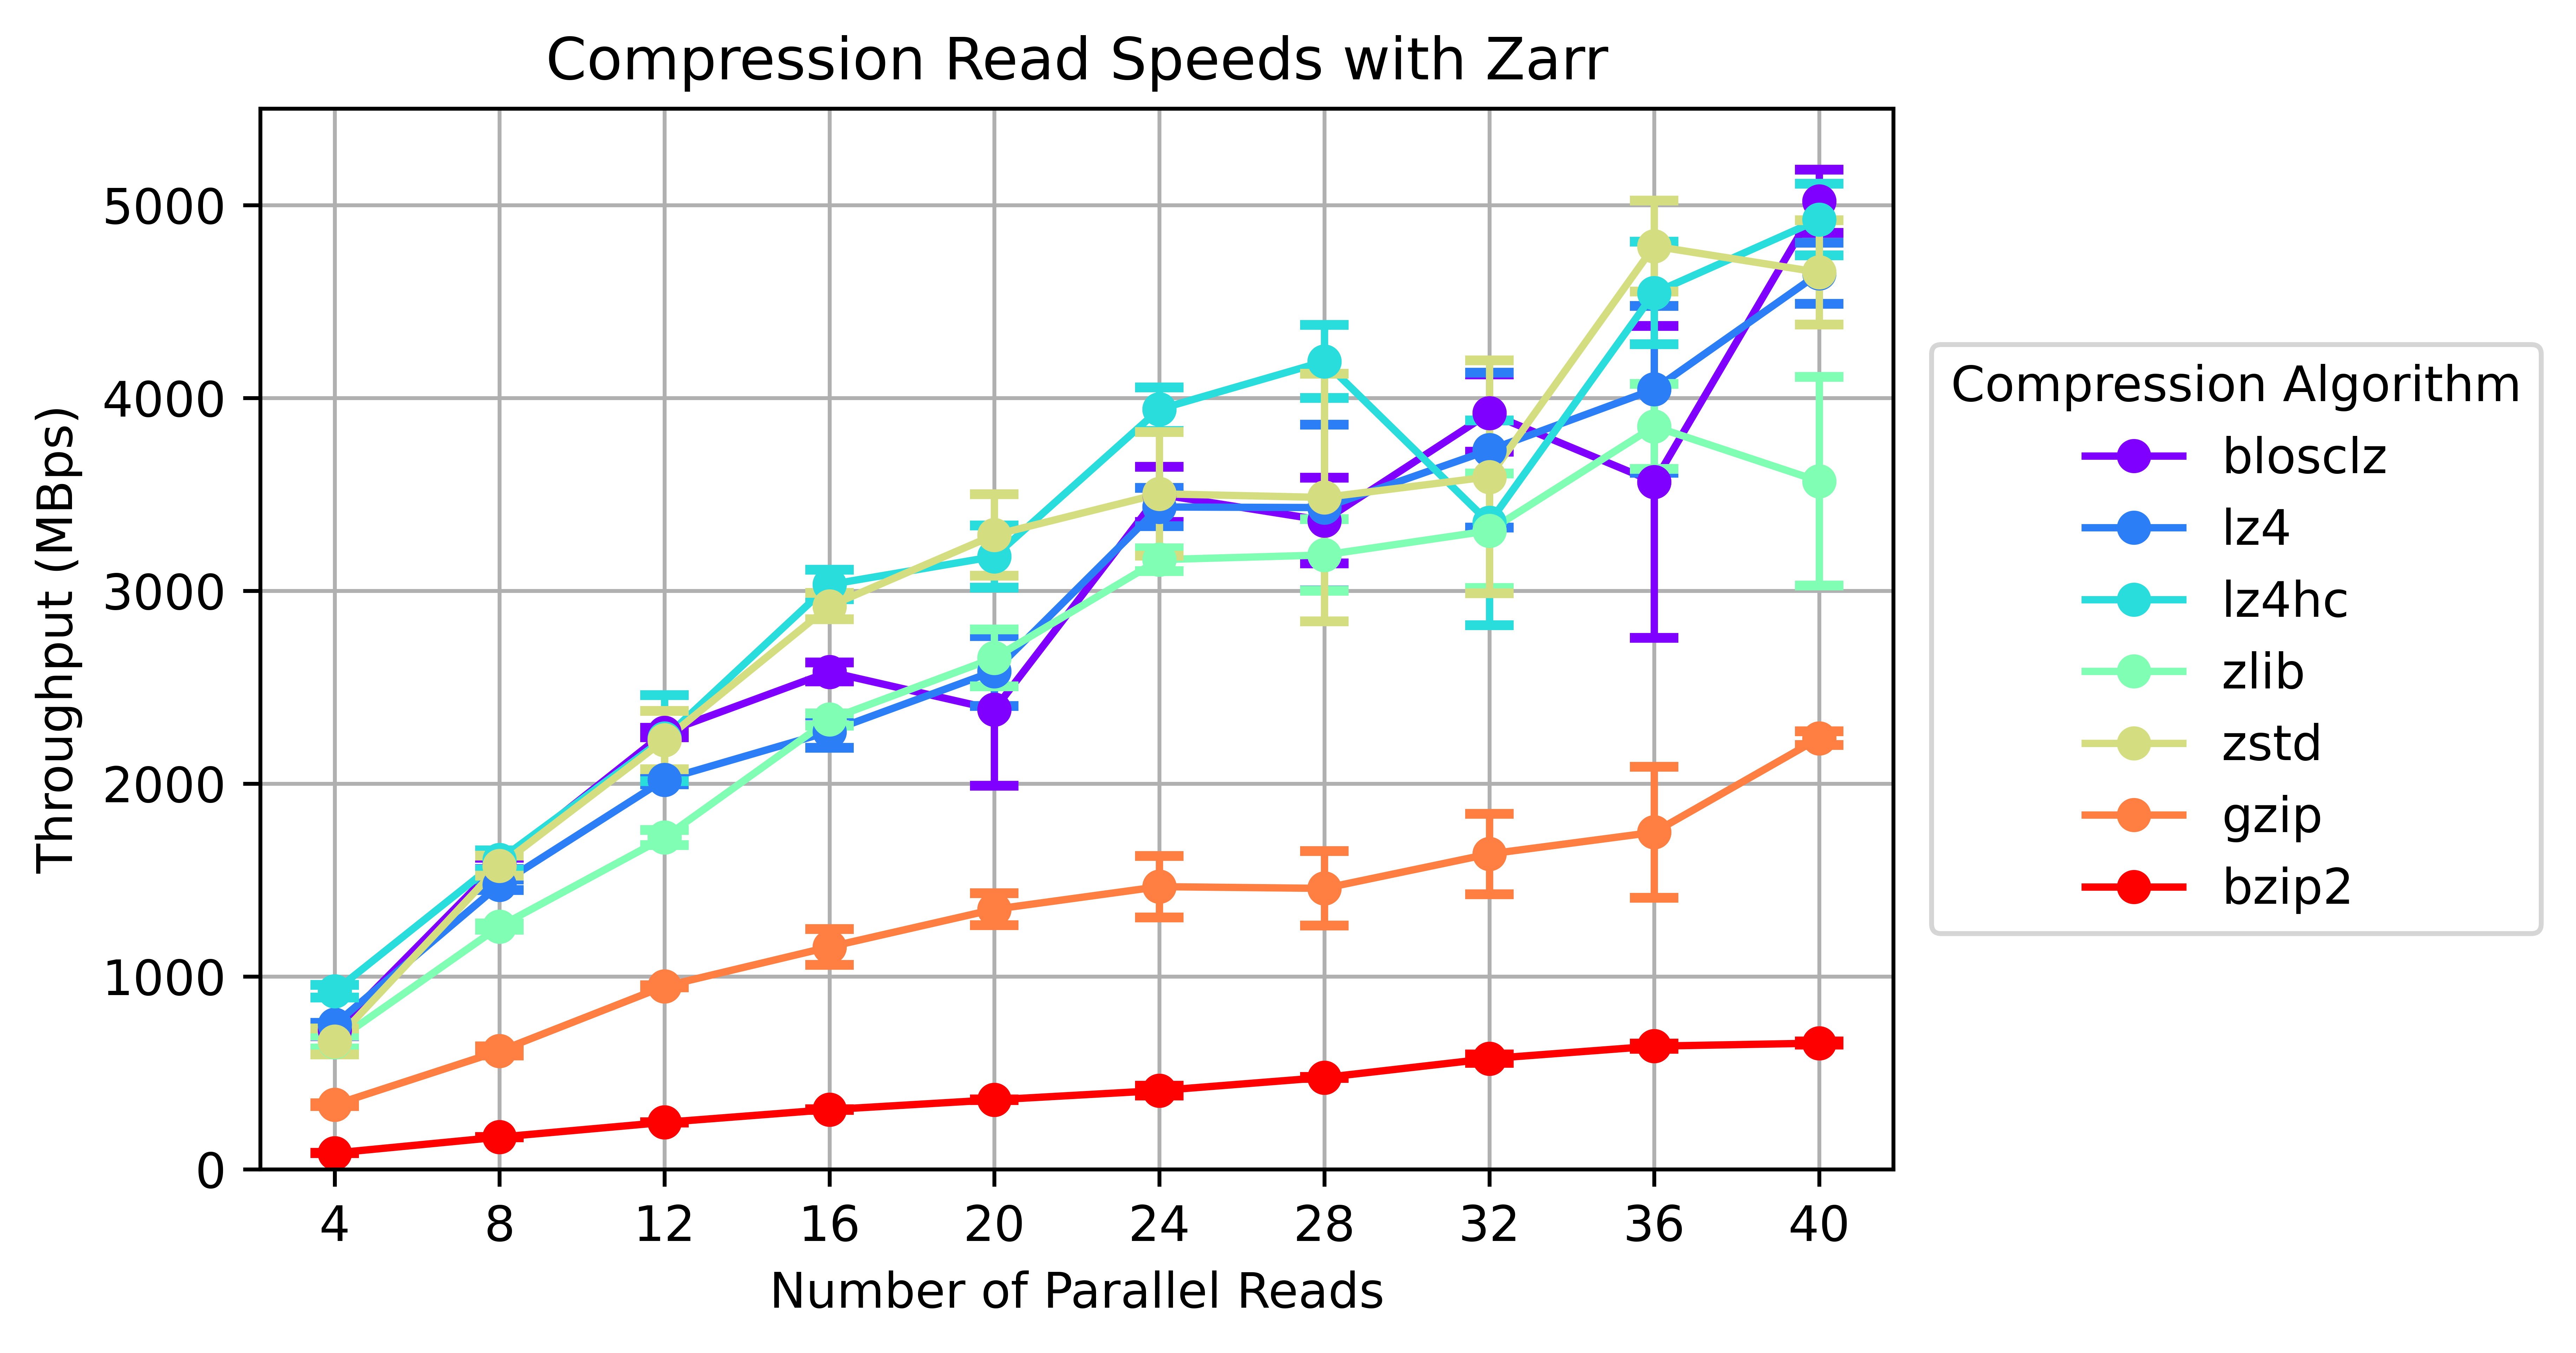

In [68]:
kwargs=dict(bbox_to_anchor=[1.21, 0.5], loc='center')
plots.plotVals(df_zarr_compression, **kwargs)

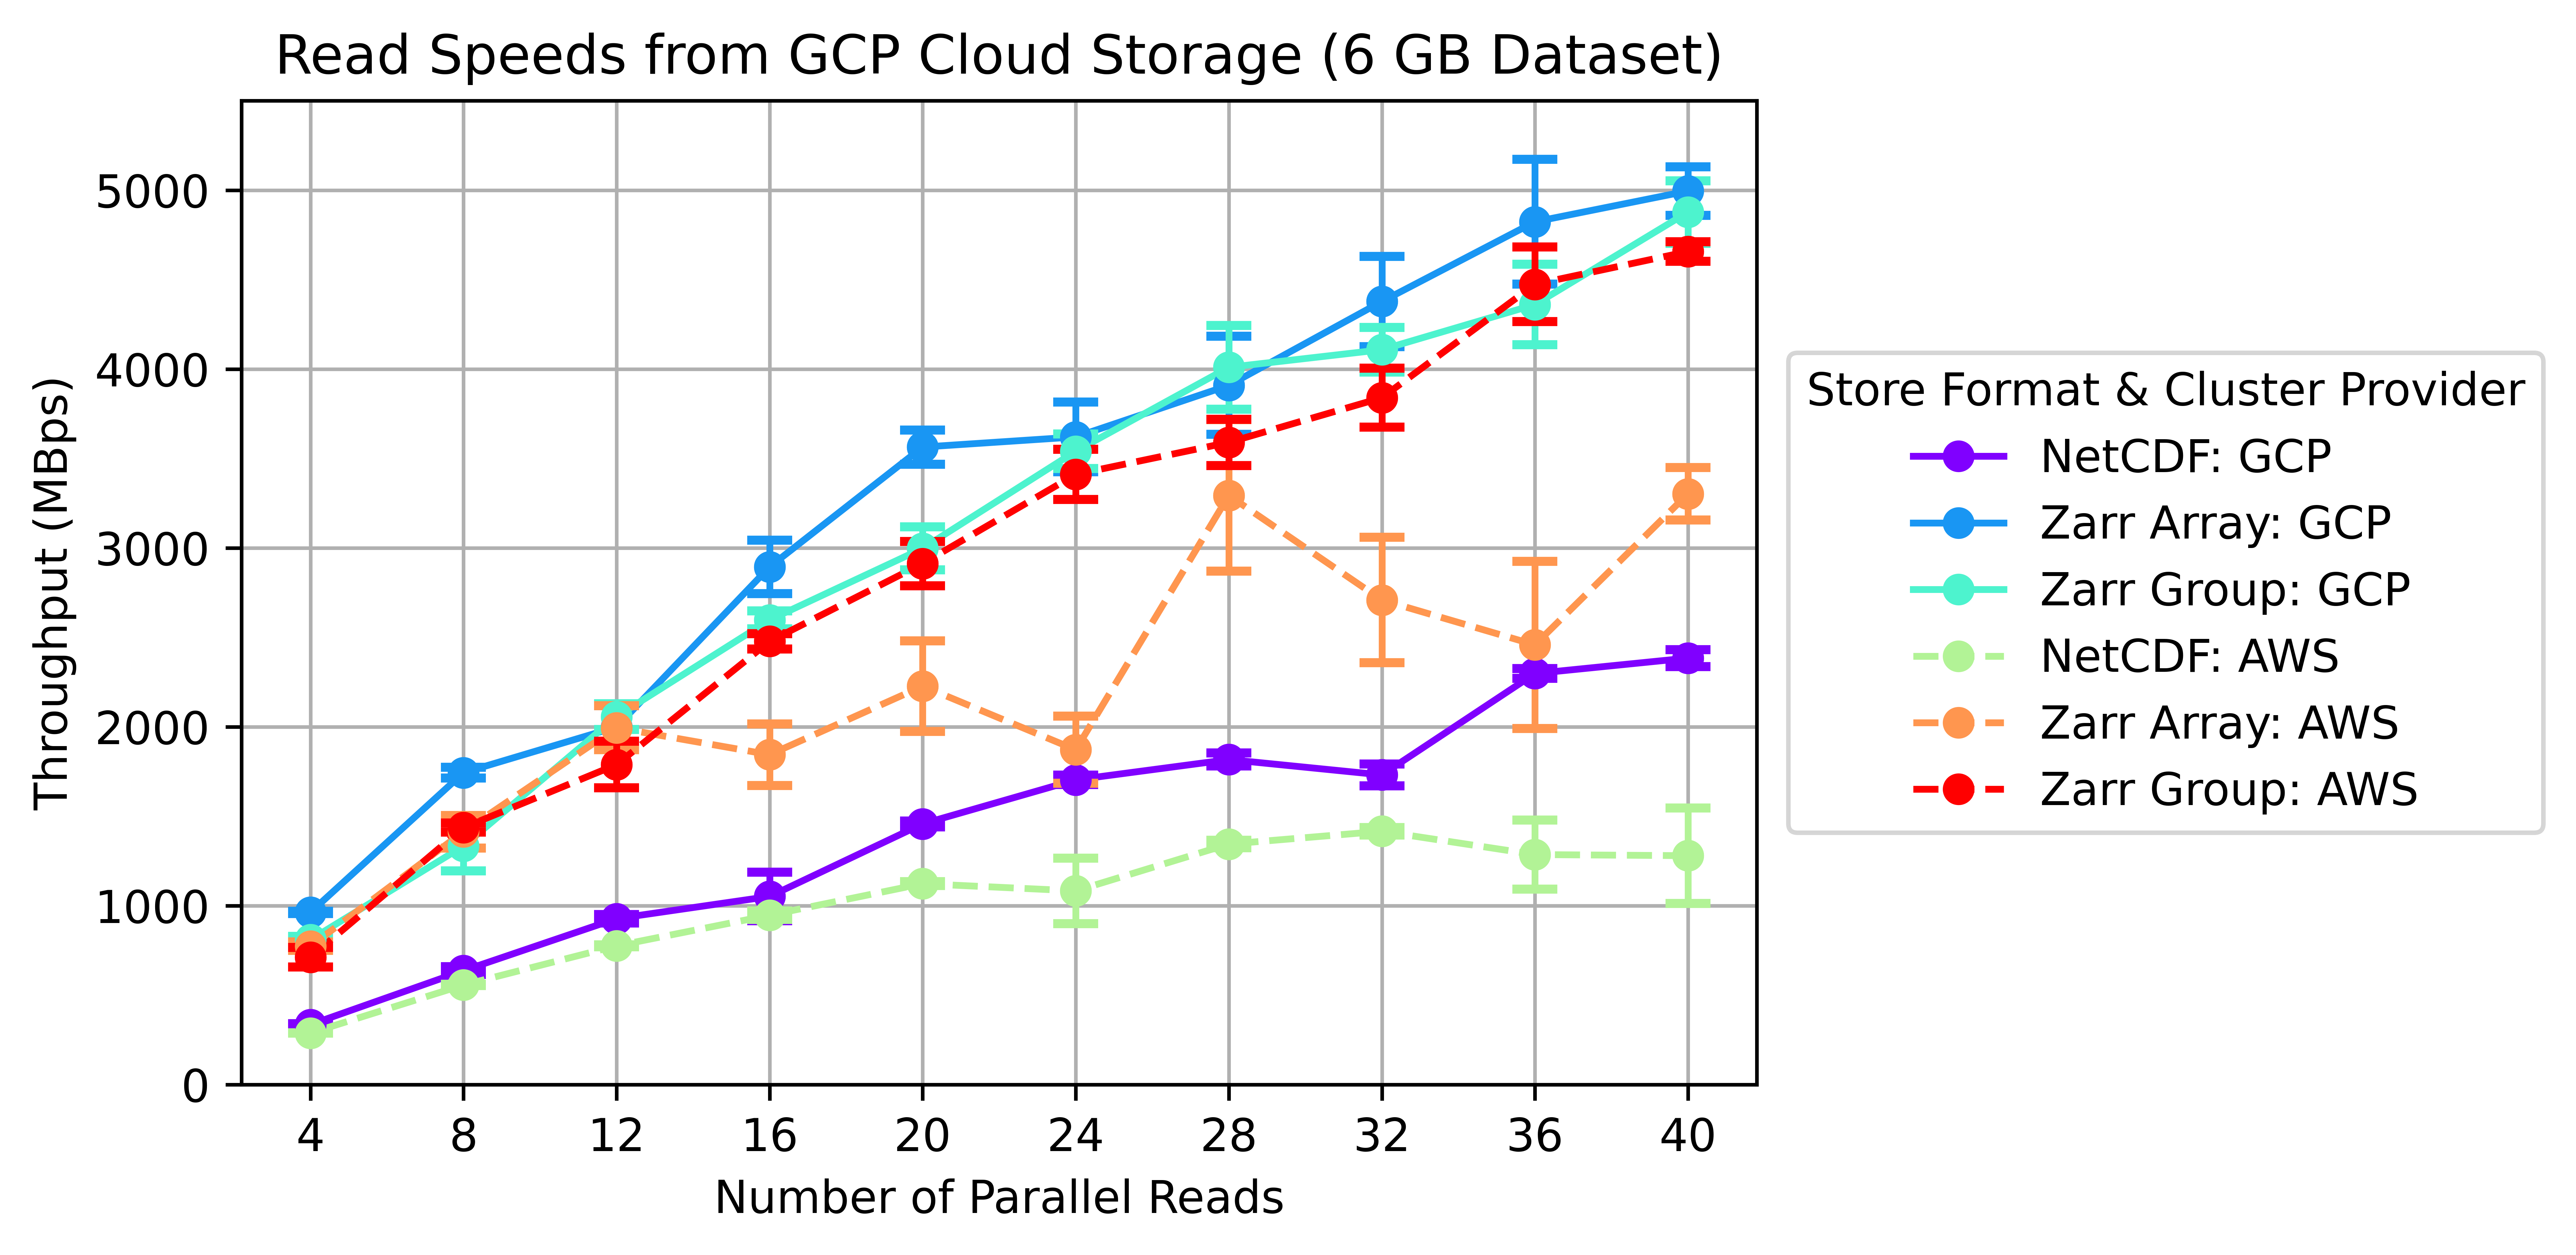

In [69]:
kwargs=dict(bbox_to_anchor=[1.27, 0.5], loc='center')
plots.plotVals(df_slp_general_gcs, **kwargs)

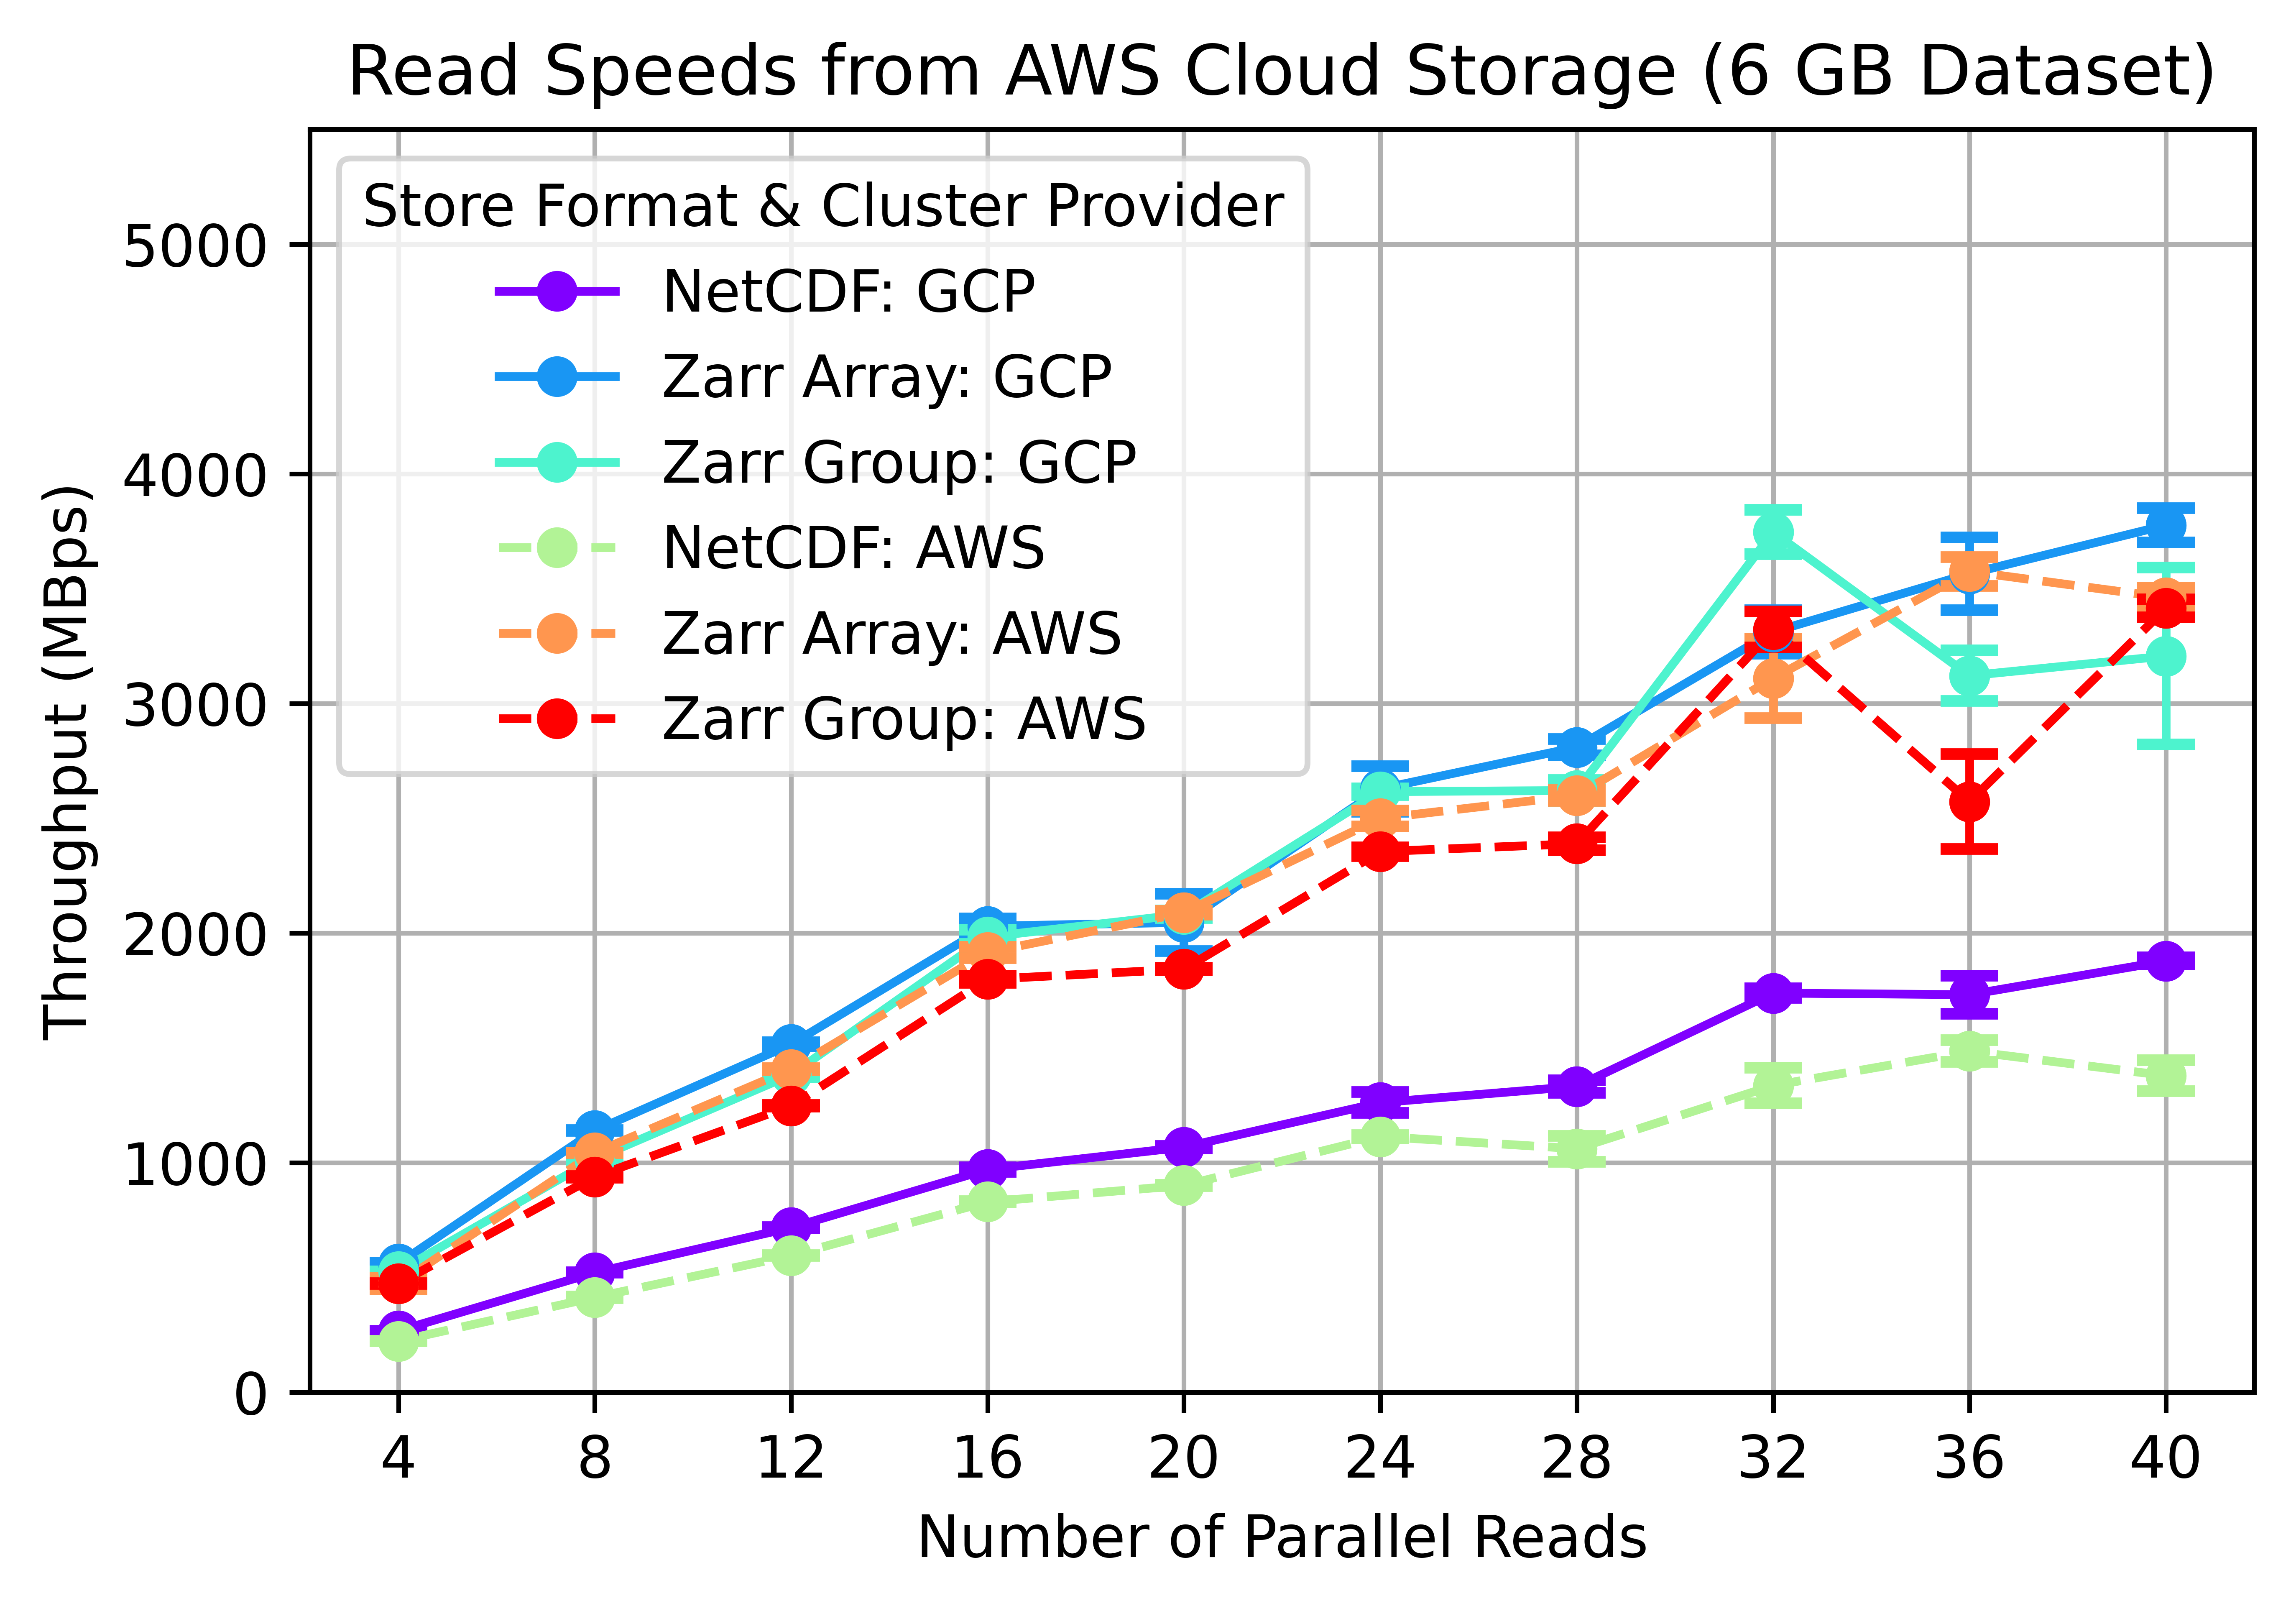

In [52]:
kwargs=dict(loc='best')
plots.plotVals(df_slp_general_s3, **kwargs)

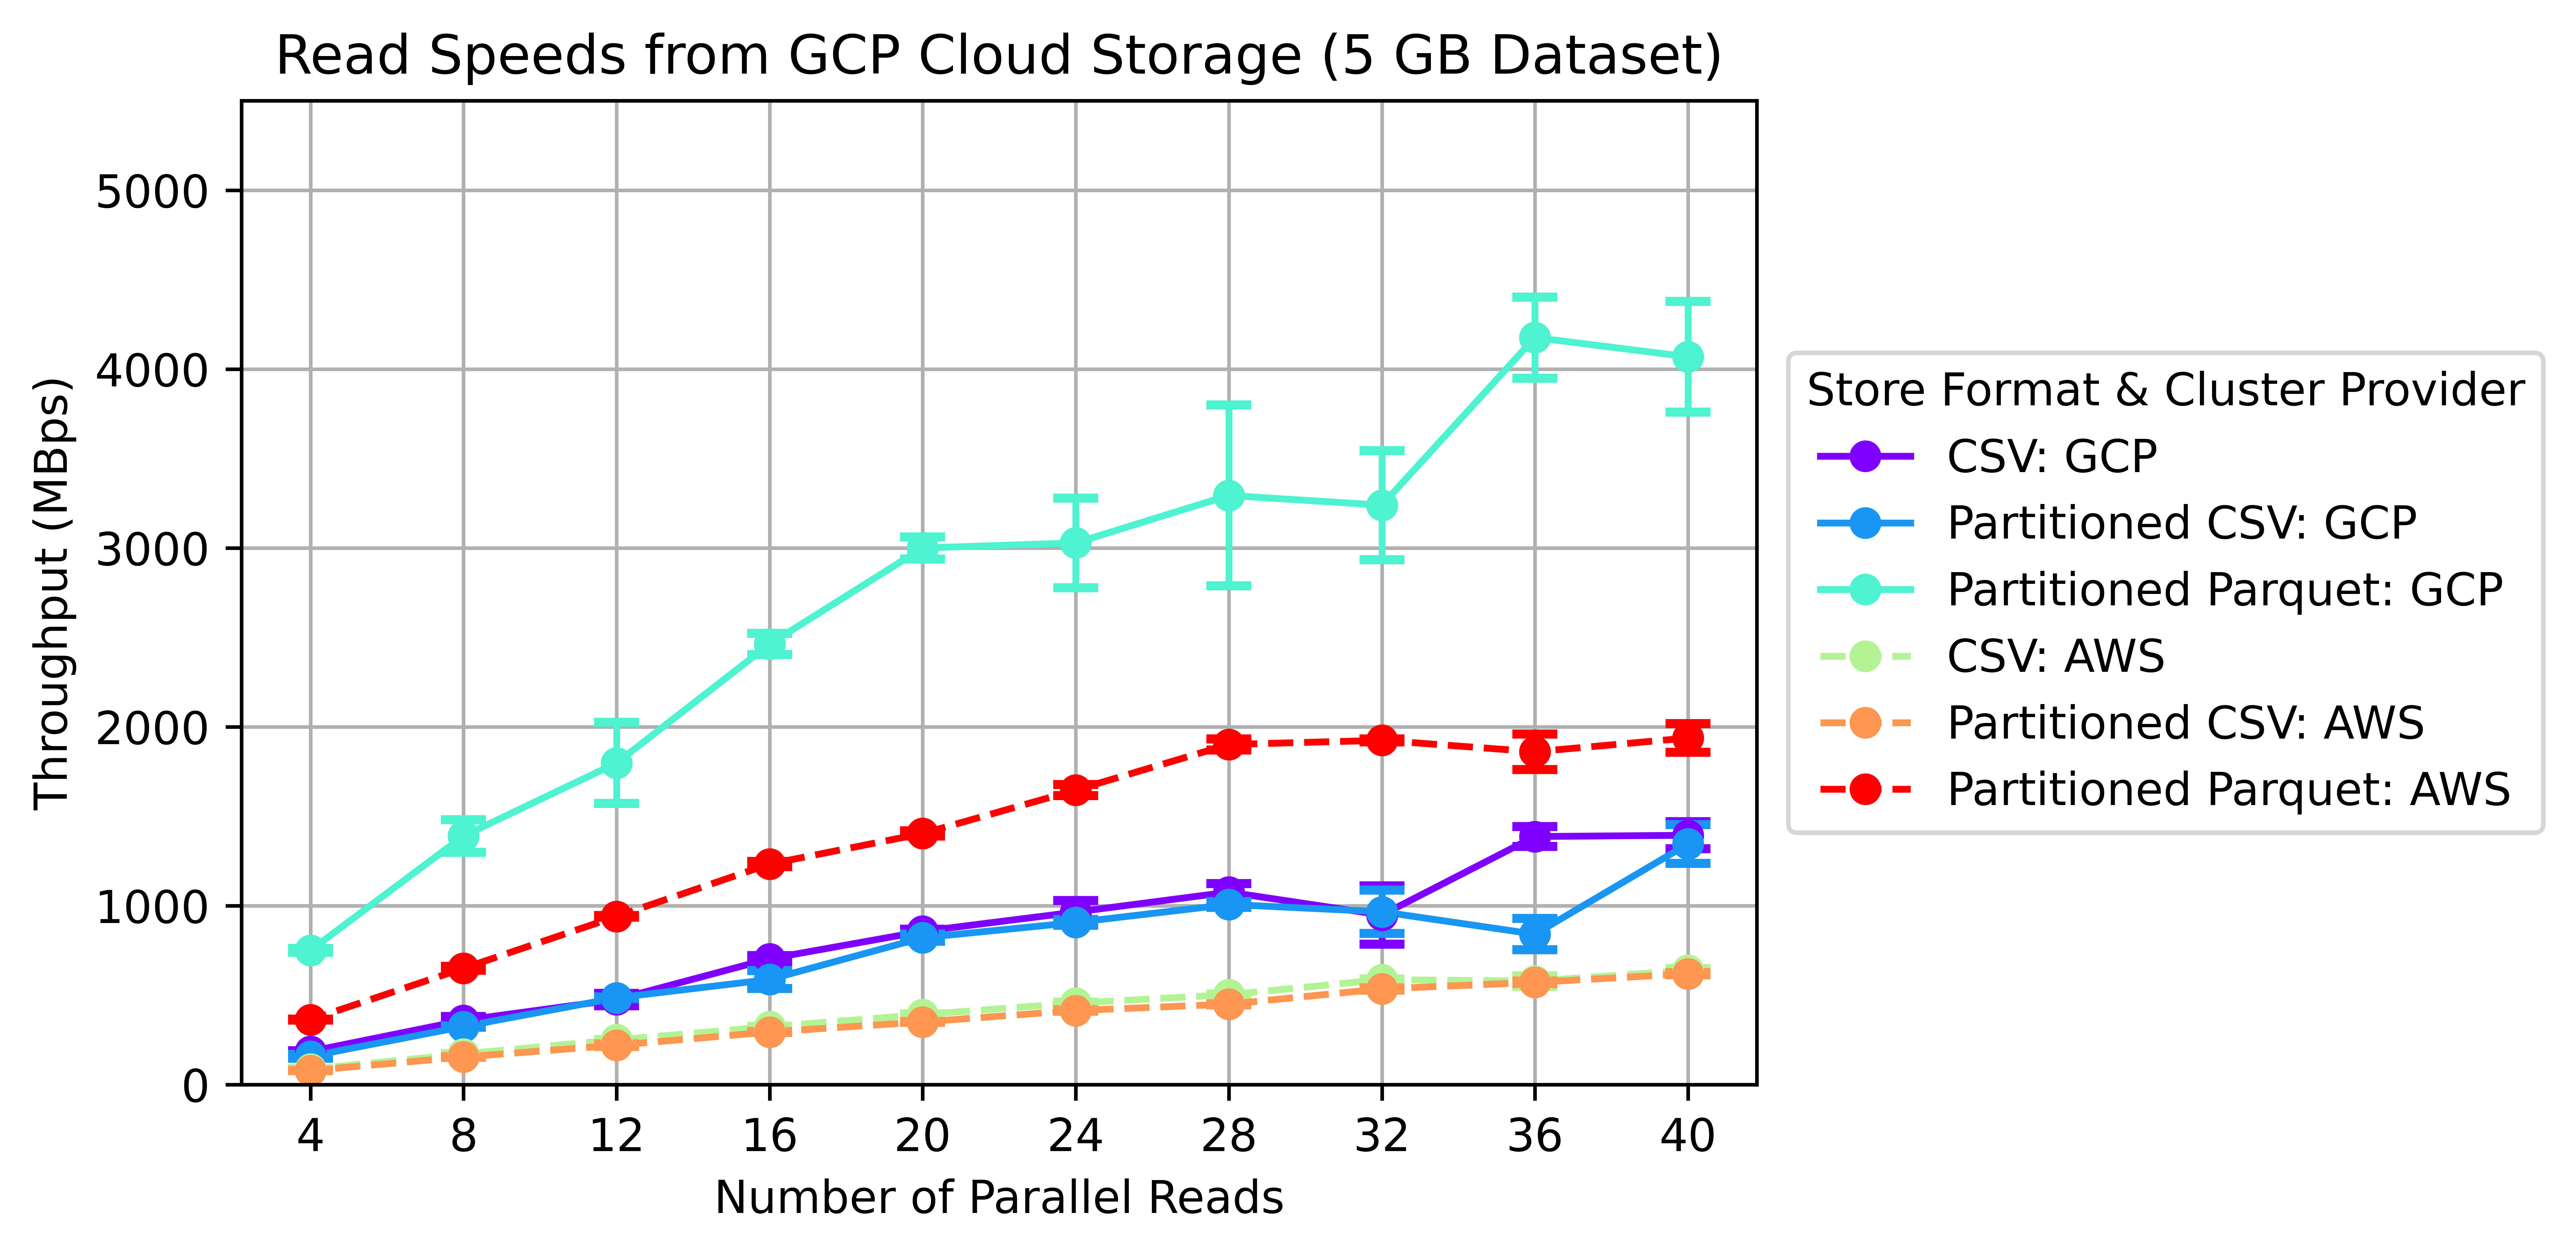

In [65]:
kwargs=dict(bbox_to_anchor=[1.27, 0.5], loc='center')
plots.plotVals(df_ETOPO1_general, **kwargs)

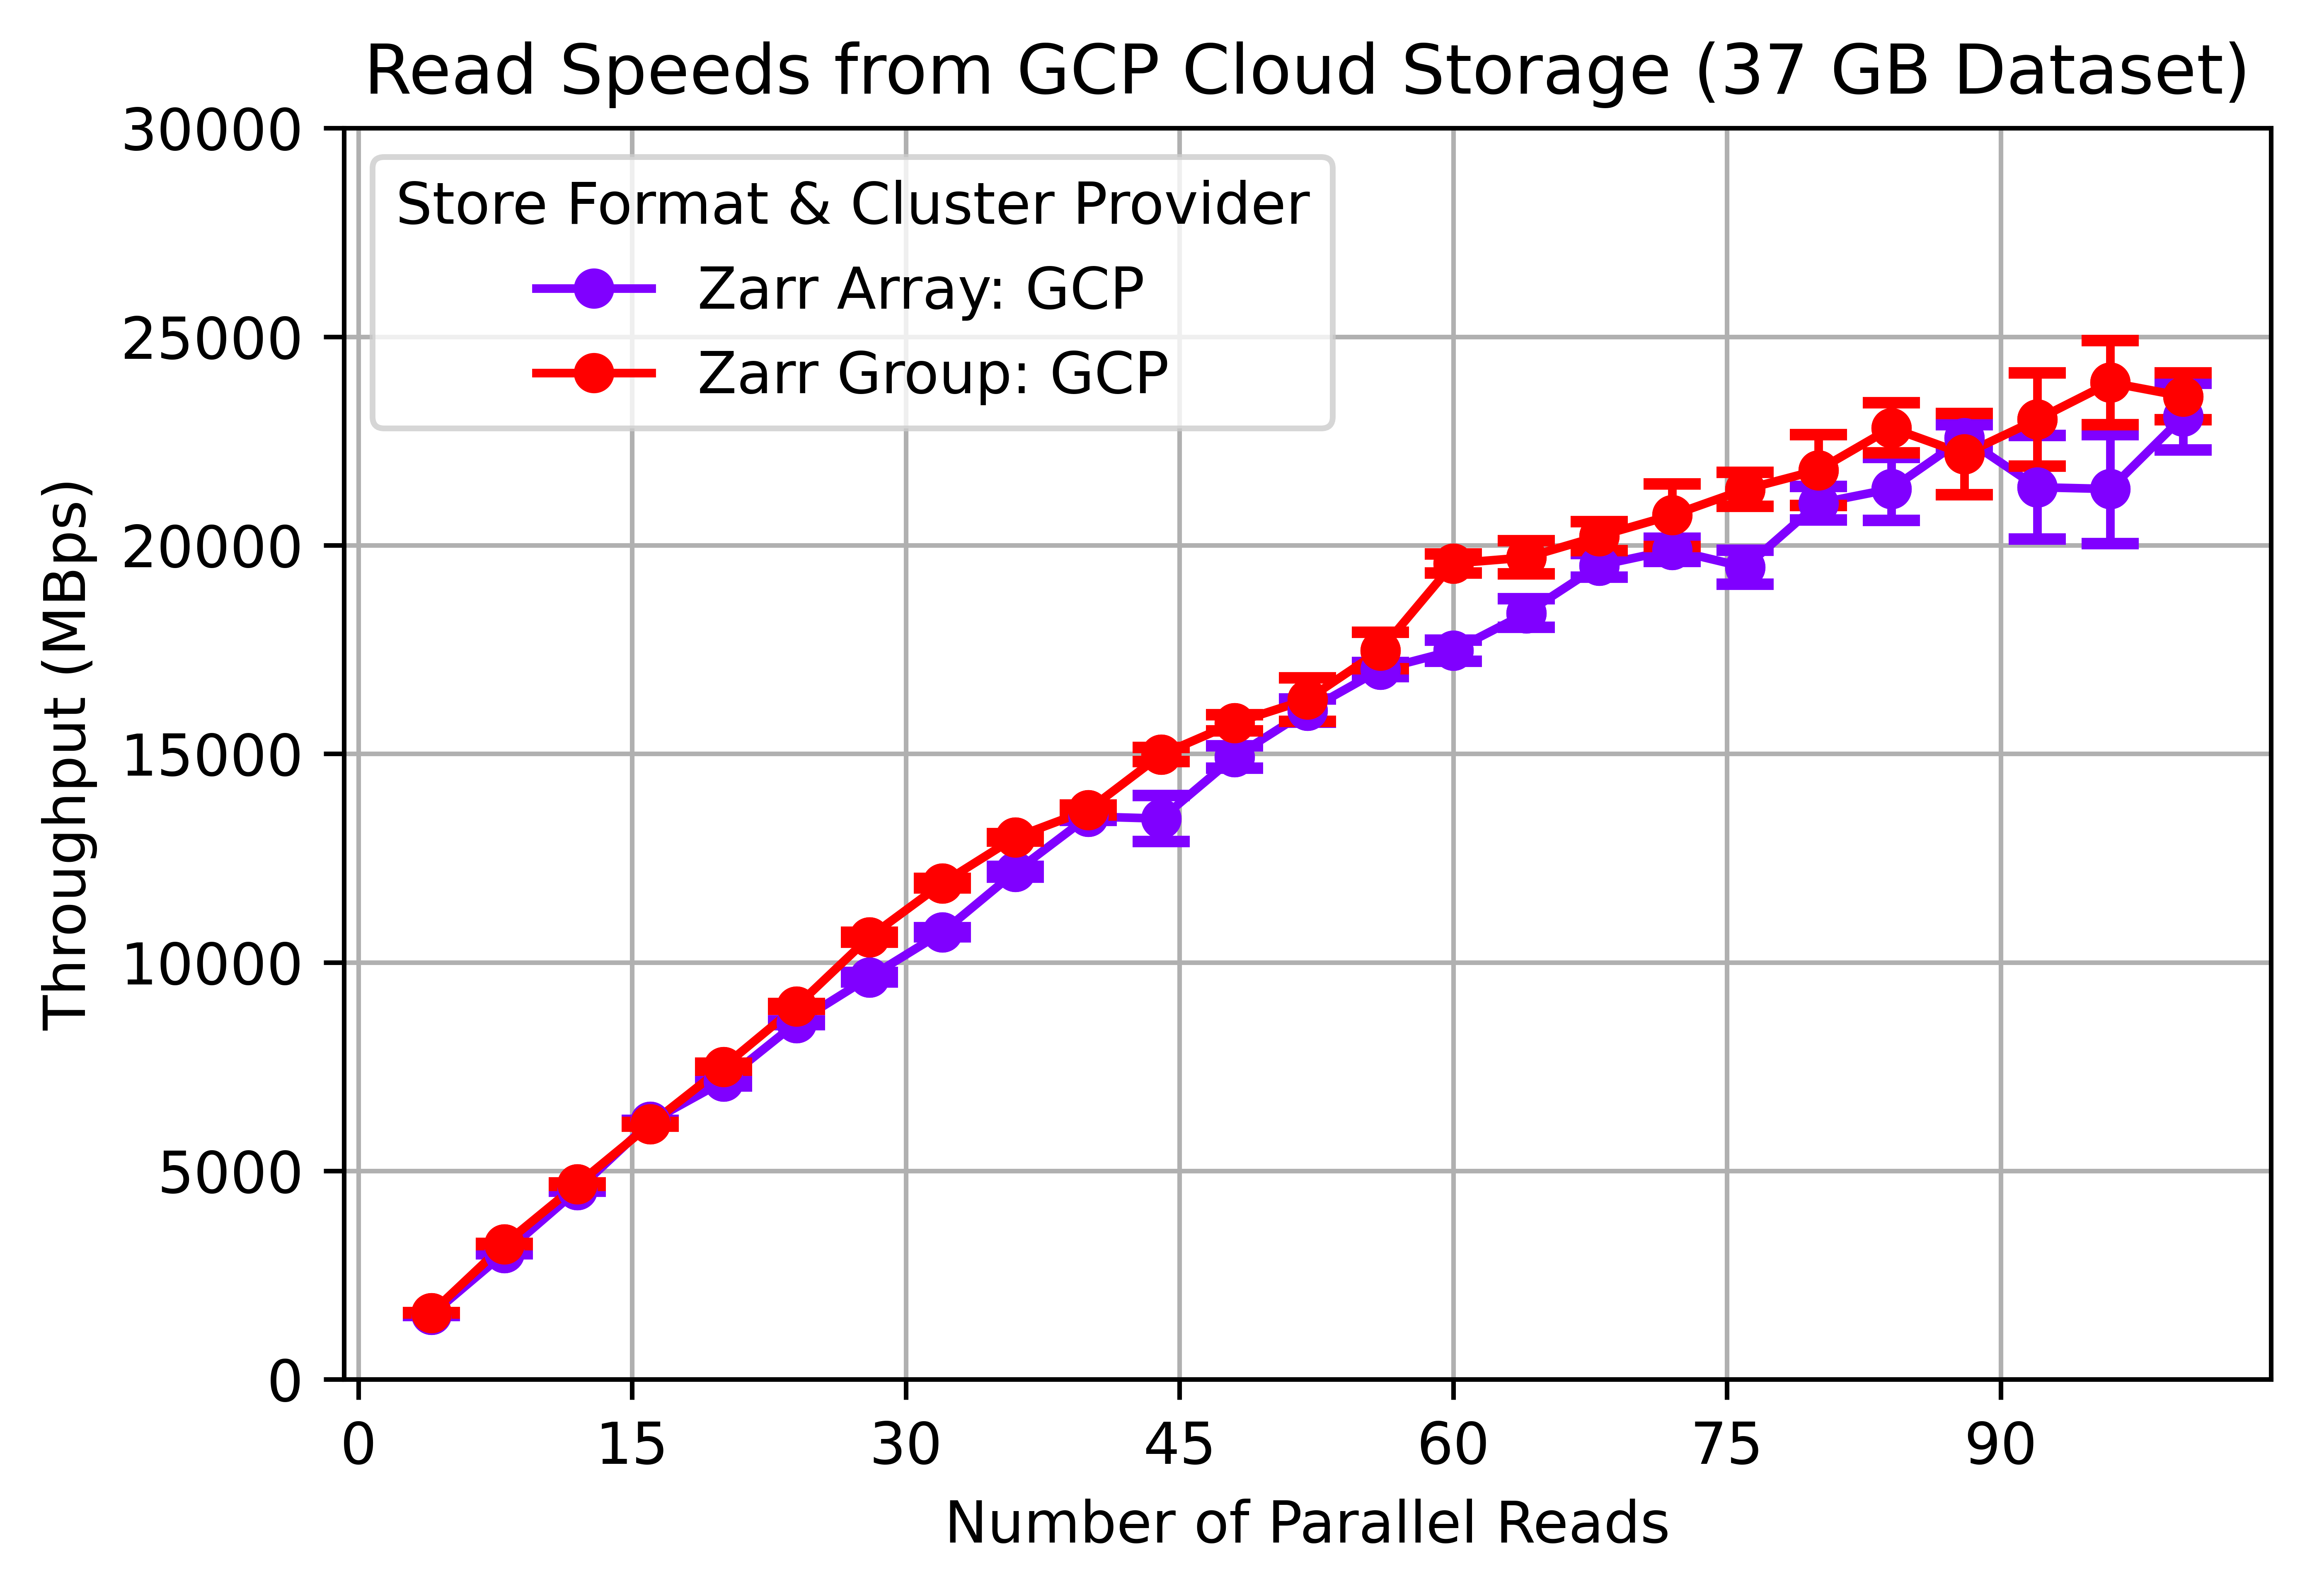

In [63]:
kwargs=dict(loc='best')
plots.plotVals(df_so_general, **kwargs)